#  Group assignment


In [ ]:
# JFB thrird comment experiment!

In [ ]:
# JFB second test comment

In [ ]:
#Juan Francisco Balbi Checking in!

## Hi! This is Isobel checking in...

## Isobel's second test comment

In [1]:
#Importing libraries
#Importing libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelBinarizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFE
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
    matthews_corrcoef, precision_score, confusion_matrix, make_scorer
import seaborn as sns
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [2]:
# This library will be needed only while using colab... Later, we can remove all of this section:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/Shareddrives/Outliers/01. Python II/Group Project/AUTO_LOANS_DATA.xlsx')

In [ ]:
df.head()

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT


In [ ]:
# conda install -c conda-forge missingno

In [4]:
import missingno as msno

In [ ]:
#Inserting and readingg the data (excel file)
#df = pd.read_excel("AUTO_LOANS_DATA.xlsx")
#df

## 1. **PENDING** - Missing not at random analysis -  Analyzing missing values

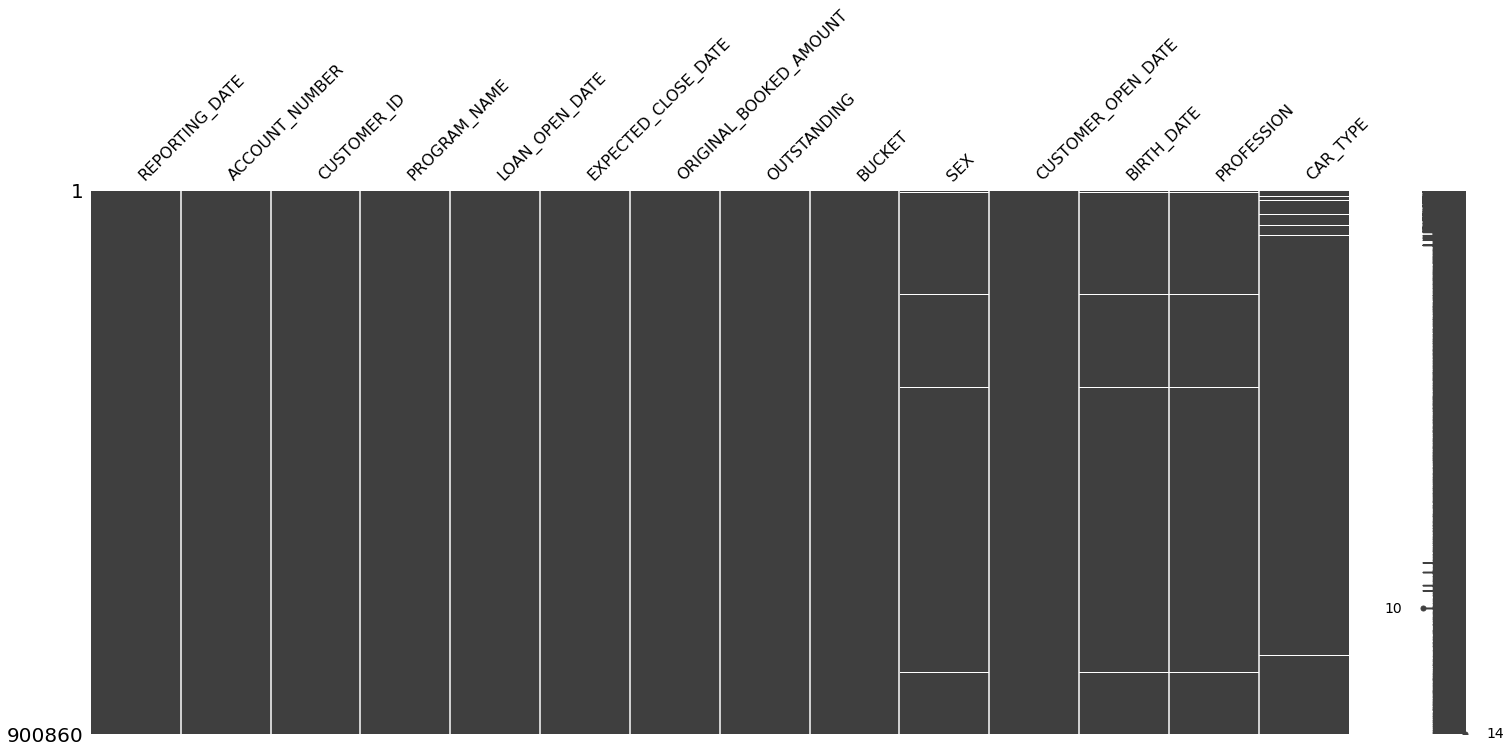

In [ ]:
#Visualize the distribution of the missing values
msno.matrix(df)


In [5]:
null_columns=df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())
print(df[df.isnull().any(axis=1)][null_columns].head())

SEX            4528
BIRTH_DATE     4533
PROFESSION     5558
CAR_TYPE      11518
dtype: int64
     SEX BIRTH_DATE     PROFESSION  CAR_TYPE
11   NaN        NaT            NaN  MERCEDES
61     M 1972-08-17         DOCTOR       NaN
117    M 1986-02-20         DRIVER       NaN
118    M 1967-03-24  Company Owner       NaN
143    M 1982-06-23     Contractor       NaN


In [6]:
df_msno = df.iloc[df[(df.isnull().sum(axis=1) >=2)].index]
test_columns =[]
null_columns=df.columns[df.isnull().any()]
for i in null_columns:
  df[i + '_test'] = np.where(df[i].isnull(),0, 1)
  test_columns.append(i + '_test')


In [7]:
first_null = 'sex'
second_null = 'birth_date'

df_msno[first_null + '_' + second_null] = df_msno['CAR_TYPE']

df_msno.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE,sex_birth_date
11,2016-01-31,12,12,Auto Loans Corporate Guarantee,2016-01-10,2019-11-28,600000.0,587821.39,0,NaN,2000-11-03,NaT,NaN,MERCEDES,MERCEDES
173,2016-01-31,174,174,Auto Loans Corporate Guarantee,2016-01-31,2018-01-03,153900.0,153900.00,0,NaN,2013-10-22,NaT,NaN,NISSAN,NISSAN
252,2016-01-31,253,174,Auto Loans Corporate Guarantee,2015-12-14,2017-12-03,142200.0,136485.21,0,NaN,2013-10-22,NaT,NaN,DAIHATSU,DAIHATSU
298,2016-01-31,299,298,Auto Loans Corporate Guarantee,2013-06-26,2016-06-03,91500.0,15348.06,0,NaN,2008-10-22,NaT,NaN,HYUNDAI,HYUNDAI
301,2016-01-31,302,12,Auto Loans Corporate Guarantee,2015-11-17,2020-10-28,80000.0,76599.33,0,NaN,2000-11-03,NaT,NaN,NISSAN,NISSAN


In [8]:
df.head()


,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE,SEX_test,BIRTH_DATE_test,PROFESSION_test,CAR_TYPE_test
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY,1,1,1,1
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET,1,1,1,1
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI,1,1,1,1
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT,1,1,1,1


In [9]:
df.info()
categorical_variables = ['PROGRAM_NAME', 'SEX', 'PROFESSION', 'CAR_TYPE']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900860 entries, 0 to 900859
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   REPORTING_DATE          900860 non-null  datetime64[ns]
 1   ACCOUNT_NUMBER          900860 non-null  int64         
 2   CUSTOMER_ID             900860 non-null  int64         
 3   PROGRAM_NAME            900860 non-null  object        
 4   LOAN_OPEN_DATE          900860 non-null  datetime64[ns]
 5   EXPECTED_CLOSE_DATE     900860 non-null  datetime64[ns]
 6   ORIGINAL_BOOKED_AMOUNT  900860 non-null  float64       
 7   OUTSTANDING             900860 non-null  float64       
 8   BUCKET                  900860 non-null  int64         
 9   SEX                     896332 non-null  object        
 10  CUSTOMER_OPEN_DATE      900860 non-null  datetime64[ns]
 11  BIRTH_DATE              896327 non-null  datetime64[ns]
 12  PROFESSION              895302

In [10]:
print (test_columns)

['SEX_test', 'BIRTH_DATE_test', 'PROFESSION_test', 'CAR_TYPE_test']


In [11]:

for t in test_columns:
  print (t)
  for col in categorical_variables:
    for i in df[col].unique():
    #  print (i)
      not_missing = df[df[col] == i][t].sum()
    #  print (i, 'not_missing is ', not_missing)
      test_rows = df[df[col] == i].shape[0]
    #  print (i, 'test_rows is ', test_rows)
      condition = (test_rows - not_missing)/test_rows
    #  print ('condition is ', condition)
      if condition > 0.9:
        print (i, ' is here and the column is ', col)


SEX_test
Auto Loans Corporate Guarantee  is here and the column is  PROGRAM_NAME


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


BIRTH_DATE_test
Auto Loans Corporate Guarantee  is here and the column is  PROGRAM_NAME
PROFESSION_test
Auto Loans Corporate Guarantee  is here and the column is  PROGRAM_NAME
CAR_TYPE_test


## **1.** Initial steps

### **1.1.** Changing the name of the columns to lower case

In [ ]:
print(list(df.columns))

['REPORTING_DATE', 'ACCOUNT_NUMBER', 'CUSTOMER_ID', 'PROGRAM_NAME', 'LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING', 'BUCKET', 'SEX', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE', 'PROFESSION', 'CAR_TYPE', 'SEX_test', 'BIRTH_DATE_test', 'PROFESSION_test', 'CAR_TYPE_test']


In [12]:
#We want to transform the name of all the columns to lower case
df.rename(columns=lambda x: x.lower(), inplace=True)

In [ ]:
print(list(df.columns))

['reporting_date', 'account_number', 'customer_id', 'program_name', 'loan_open_date', 'expected_close_date', 'original_booked_amount', 'outstanding', 'bucket', 'sex', 'customer_open_date', 'birth_date', 'profession', 'car_type', 'sex_test', 'birth_date_test', 'profession_test', 'car_type_test']


### **1.2.** Removing duplicate records

In [13]:
#Locate the entire duplicated rows. Result = 0
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 18)


In [14]:
#Check for duplicate rows based on ACCOUNT_NUMBER and CUSTOMER_ID
duplicate_rows_df = df[df.duplicated(subset=['account_number', 'customer_id'])]
print('number of duplicate rows: ', duplicate_rows_df.shape)
duplicate_rows_df.sort_values(['customer_id', 'reporting_date'], ascending=True, inplace = True)
duplicate_rows_df.head(15)

number of duplicate rows:  (861263, 18)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,sex_test,birth_date_test,profession_test,car_type_test
31411,2016-02-29,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,87272.39,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
49109,2016-03-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,86229.56,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
85225,2016-04-28,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,85248.70,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
100035,2016-05-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,84215.26,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
131217,2016-06-29,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,83204.23,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
156314,2016-07-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,82141.07,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
173243,2016-08-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,81098.97,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
194867,2016-09-29,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,80041.26,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
227201,2016-10-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,78932.14,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1
257326,2016-11-30,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,77841.98,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,1,1,1,1


In [15]:
# Drop duplicates and keep only last opened loan per account 

print("\n old shape: ",  df.shape) # Confirm original dataframe shape
df = df.sort_values(by="reporting_date").drop_duplicates(subset=["account_number", 'customer_id'], keep="last") # drop duplicates
print("\n new shape: ",  df.shape) # Confirm dataframe reduction


 old shape:  (900860, 18)

 new shape:  (39597, 18)


In [16]:
df.head()

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,sex_test,birth_date_test,profession_test,car_type_test
15639,2016-01-31,15640,15378,Auto Loans 40% Down Payment - Self Employed,2013-01-02,2016-01-03,81600.0,0.0,0,M,2012-12-03,1969-02-19,Company Owner,NaN,1,1,1,0
15651,2016-01-31,15652,15390,Pick Up and Small Trucks,2013-11-25,2015-11-03,84000.0,0.0,0,M,2013-11-11,1984-02-18,Shop Owner,NaN,1,1,1,0
15582,2016-01-31,15583,15323,Auto Loans 30% Down Payment - Self Employed,2015-06-24,2020-06-03,113400.0,0.0,7,M,2015-04-29,1988-08-23,Shop Owner,NaN,1,1,1,0
15741,2016-01-31,15742,15477,Auto Loans 30% Down Payment - Employed,2015-01-22,2020-02-03,57750.0,0.0,0,M,2014-09-24,1975-11-01,EMPLOYEE,NaN,1,1,1,0
15689,2016-01-31,15690,15427,Auto Loans Special Deals,2012-01-30,2016-01-22,65600.0,0.0,0,M,2011-01-05,1985-12-18,EMPLOYEE,NaN,1,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39597 entries, 15639 to 900859
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   reporting_date          39597 non-null  datetime64[ns]
 1   account_number          39597 non-null  int64         
 2   customer_id             39597 non-null  int64         
 3   program_name            39597 non-null  object        
 4   loan_open_date          39597 non-null  datetime64[ns]
 5   expected_close_date     39597 non-null  datetime64[ns]
 6   original_booked_amount  39597 non-null  float64       
 7   outstanding             39597 non-null  float64       
 8   bucket                  39597 non-null  int64         
 9   sex                     39320 non-null  object        
 10  customer_open_date      39597 non-null  datetime64[ns]
 11  birth_date              39319 non-null  datetime64[ns]
 12  profession              39281 non-null  o

### **1.3.** Binning the target variable ("bucket")

In [18]:
df['bucket'].value_counts()

0    34990
1     2073
7     1149
2      805
3      306
4      147
5       85
6       42
Name: bucket, dtype: int64

In [19]:
# The variable "bucket" indicates the number of unpaid installements at each reporting date. We have transformed
# this variable to dummy variables to indicate whether the user has had unpaid installments (1) or not(0).
bucket_replace = {2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
df = df.replace({'bucket': bucket_replace})

In [20]:
df['bucket'].value_counts()

0    34990
1     4607
Name: bucket, dtype: int64

## 2. Data Preparation

### **2.1**. Dealing with date columns

To deal with date columns, we decided to do the following:

1. Identify Date Columns
2. Convert them into date format
3. Calculate the time difference between the mentioned date and the date of the 4. report
5. All the dates will be in months except the age in years
6. Calculate the expected loan duration in terms of months (e.g. a 44 months loan or a 60 months loan...etc.)
7. Finally, drop the original date columns as they would be replaced by the duration columns

In [21]:
from datetime import datetime

#I am not chossing the 'REPORTING_DATE' columns as it is not helping our analysis
date_columns = ['loan_open_date', 'expected_close_date', 'customer_open_date', 'birth_date'  ]

# Assuming the report date is today's date
today_date = datetime.strptime('2019-09-01',"%Y-%m-%d") 


for col in date_columns:
    df[col] =  pd.to_datetime(df[col],format='%Y-%m-%d') 
    age_col = col.split('_')
    age_col = col[0:(len(col)-4)]
    age_col = ''.join(age_col)+'duration'
    df[age_col] = df[col].apply(lambda x: today_date.month - x.month + 12*(today_date.year - x.year))

df['birth_duration'] = df['birth_duration'].fillna(0).replace('NaN',0).replace('',0)
df['age'] = df['birth_duration'].apply(lambda x: round(x/12))

df['loan_expected_duration'] =  df['expected_close_date'].dt.month - df['loan_open_date'].dt.month + 12*(df['expected_close_date'].dt.year - df['loan_open_date'].dt.year)

df.drop(['birth_duration', 'reporting_date', 'loan_open_date', 'expected_close_date',  'birth_date', 'customer_open_date'], axis = 1, inplace = True)

### **2.2.** Removing Nans

#### **2.2.1.** Selecting only the numerics to replace NaNs or blanks with 0 

In [22]:
#Check the amount of missing values that we have in each variable
df.isnull().sum()

account_number                0
customer_id                   0
program_name                  0
original_booked_amount        0
outstanding                   0
bucket                        0
sex                         277
profession                  316
car_type                   2302
sex_test                      0
birth_date_test               0
profession_test               0
car_type_test                 0
loan_open_duration            0
expected_close_duration       0
customer_open_duration        0
age                           0
loan_expected_duration        0
dtype: int64

In [23]:
list_numeric_columns = ['age']
for item in list_numeric_columns:
    df[item] = df[item].fillna(0).replace('NaN',0).replace('',0)

###  **2.3.** Dealing with categorical variables using the observation rate

In [26]:
#As we did before, let’s explore in how many different car types we have in the dataset:
df['car_type'].unique()


array(['RENAULT', 'KIA', 'HYUNDAI', 'NISSAN', 'Brilliance', 'CHEVROLET',
       'SUZUKI', 'Speranza', 'GELY', 'SKODA', 'MITSUBISHI', 'Changan',
       'Livan', 'JEEP', 'TOYOTA', 'CARRY', 'Great Wall', 'LADA',
       'VOLKSWAGEN', 'FIAT', 'OPEL', 'BYD', 'Chana', 'Citroen', 'SEAT',
       'Peugeot', 'DAIHATSU', 'Saipa', 'PROTON', 'VOLVO', 'MERCEDES',
       'MAZDA', 'BMW', 'SUBARU', 'Jack', 'FORD', 'CHERY', 'Gelory',
       'Isuzu', 'MABLE', 'HONDA', 'Mahindra', 'MG', 'BAIC', 'Ssang Yong',
       'ZEMEX', 'Kenbo', 'HAIMA', 'SAWEAST', 'CHANGY', 'MINI', 'AUDI',
       'Dodge', 'Faw', 'FLORIDA', 'DFSK', 'Zoty', 'HAWTAI', 'JAGUAR',
       'VICTORY'], dtype=object)

In [27]:
observation_rate = {}
list1 = []

for cat in categorical_variables:
  for i in df['car_type'].unique():
  
    if df[df['car_type'] == i]['bucket'].value_counts().shape[0] == 2:
      pass
    else: 
      list1.append(i)
   


  for i in list1:
    print (df[df['car_type'] == i]['bucket'].value_counts())

0    15
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    3
Name: bucket, dtype: int64
0    15
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    3
Name: bucket, dtype: int64
0    15
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    3
Name: bucket, dtype: int64
0    15
Name: bucket, dtype: int64
0    2
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    1
Name: bucket, dtype: int64
0    4
Name: bucket, dtype: int64
0    2
Nam

In [28]:
observation_rate = {}

for cat in categorical_variables:
  observation_rate[cat] = {}
  for i in df[cat].unique():

    if df[df[cat] == i]['bucket'].value_counts().shape[0] == 2:
      
      observation_rate[cat][i] = df[(df[cat] == i)]['bucket'].value_counts()[1]/(df[(df[cat] == i)]['bucket'].value_counts()[1]+df[(df[cat] == i)]['bucket'].value_counts()[0])
      
    
    else: 
      observation_rate[cat][i] = 0
      


  
print(observation_rate)


{'program_name': {'Auto Loans 50% Down Payment - Employed': 0.10127909414971692, 'Auto Loans 50% Down Payment - Self Employed': 0.08226458694396303, 'Auto Loans 30% Down Payment - Employed': 0.17064377682403434, 'Auto Loans 40% Down Payment - Self Employed': 0.13864125422686752, 'Auto Loans Payroll Clients': 0.07142857142857142, 'Auto Loans 40% Down Payment - Employed': 0.1258208006778225, 'Auto Loans Special Deals': 0.027164685908319185, 'Pick Up and Small Trucks': 0.09558823529411764, 'Auto Loans 30% Down Payment - Self Employed': 0.1846739647786768, 'Auto Loans 20% Down Payment - Employed': 0.17134831460674158, 'Auto Loans 20% Down Payment - Self Employed': 0.0945273631840796, 'Auto Loans Secured against CD': 0.038461538461538464, 'Auto Loans Doctors - Self Employed': 0, 'Auto Loans Fully Secured': 0.07142857142857142, 'Auto Loans 50% Down Payment No Car Prohibition - Self Employed': 0.175, 'Auto Loans Doctors - Employed': 0, 'Auto Loans Run Off - Employed': 0, 'Auto Loans Run Off -

In [ ]:
df.head()

,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,sex,profession,car_type,sex_test,birth_date_test,profession_test,car_type_test,loan_open_duration,expected_close_duration,customer_open_duration,age,loan_expected_duration
110070,19665,19286,Auto Loans 50% Down Payment - Employed,35000.0,0.0,0,M,RETIRED,RENAULT,1,1,1,1,100,40,100,52,60
110096,14950,14707,Auto Loans 50% Down Payment - Self Employed,58000.0,0.0,0,M,Shop Owner,KIA,1,1,1,1,77,40,77,39,37
109791,8847,8728,Auto Loans 30% Down Payment - Employed,57400.0,0.0,0,M,EMPLOYEE,HYUNDAI,1,1,1,1,62,2,62,40,60
109788,8879,8759,Auto Loans 50% Down Payment - Self Employed,39000.0,0.0,1,M,Company Owner,NISSAN,1,1,1,1,86,26,86,38,60
109835,13819,13599,Auto Loans 30% Down Payment - Employed,61600.0,0.0,0,M,Accountant - Employee,HYUNDAI,1,1,1,1,50,-11,50,58,61


In [29]:
for cat in categorical_variables:
  print (cat)
  cat_col = ''.join(cat)+'_rate'
  location = df.columns.get_loc(cat)+1
  df.insert(location, cat_col,True)
  df[cat_col] = df[cat].map(observation_rate[cat]) 

df.head()

program_name
profession
car_type


,account_number,customer_id,program_name,program_name_rate,original_booked_amount,outstanding,bucket,sex,profession,profession_rate,car_type,car_type_rate,sex_test,birth_date_test,profession_test,car_type_test,loan_open_duration,expected_close_duration,customer_open_duration,age,loan_expected_duration
110070,19665,19286,Auto Loans 50% Down Payment - Employed,0.101279,35000.0,0.0,0,M,RETIRED,0.034783,RENAULT,0.137370,1,1,1,1,100,40,100,52,60
110096,14950,14707,Auto Loans 50% Down Payment - Self Employed,0.082265,58000.0,0.0,0,M,Shop Owner,0.117896,KIA,0.094802,1,1,1,1,77,40,77,39,37
109791,8847,8728,Auto Loans 30% Down Payment - Employed,0.170644,57400.0,0.0,0,M,EMPLOYEE,0.128026,HYUNDAI,0.116664,1,1,1,1,62,2,62,40,60
109788,8879,8759,Auto Loans 50% Down Payment - Self Employed,0.082265,39000.0,0.0,1,M,Company Owner,0.123310,NISSAN,0.118927,1,1,1,1,86,26,86,38,60
109835,13819,13599,Auto Loans 30% Down Payment - Employed,0.170644,61600.0,0.0,0,M,Accountant - Employee,0.136773,HYUNDAI,0.116664,1,1,1,1,50,-11,50,58,61


### **2.4**. Selecting non-numerics to replace NaNs with blanks

In [24]:
categorical_variables = ['program_name', 'profession', 'car_type']

In [25]:
df.dropna(subset = ['car_type', 'sex', 'profession'], inplace=True)

In [ ]:
# Within the non-numeric variables with missing values, we can distinguish two groups: 
    #1 - Non-numerics which have missing values related to the type of user (MNAR): Corporate users do not contain information
    #regarding the sex or profession.
    
    #2 - Non-numerics with missing at random data (MAR)- concretelly, the variable CAR_TYPE.
    
#We will deal with these situations differently: 

#1 - MNAR for Corporate users: 
       
list_non_numeric_columns = ['profession_class', 'sex']
for item in list_non_numeric_columns:
    df[item] = df[item].fillna('').replace('NaN','');
    
#2 - MAR for CAR_TYPE:
    #Once the variable CAR_TYPE is converted to a categorical variable, we will replace the missing values with 
    #the most common value of the variable (the mode). Refer to point "12 - Transforming the variable "car_type" 
    #to categorical" to see this point.
    

KeyError: ignored

### **2.5** Dealing with categorical variables

#### **2.5.1.** Transforming the variable "program_name" into a categorical variable
For the PROGRAM_NAME categorical variable, we decided to bin it into 4 categories:
1. The "Employed" Category: Contains all program types targeted to employed people
2. The "Self Employed" Category: Contains all program types targeted to Self Employed people
3. The "Corporates" Category: Contains all program types targeted to companies
4. The "Others" Category: contains all other categories

In [ ]:
df['program_name']

110070         Auto Loans 50% Down Payment - Employed
110096    Auto Loans 50% Down Payment - Self Employed
109791         Auto Loans 30% Down Payment - Employed
109788    Auto Loans 50% Down Payment - Self Employed
109835         Auto Loans 30% Down Payment - Employed
                             ...                     
890128         Auto Loans 50% Down Payment - Employed
890129         Auto Loans 30% Down Payment - Employed
890130    Auto Loans 30% Down Payment - Self Employed
890117         Auto Loans 50% Down Payment - Employed
900859         Auto Loans 40% Down Payment - Employed
Name: program_name, Length: 37023, dtype: object

In [ ]:
program_employed_map = ['Auto Loans 50% Down Payment - Employed', 'Auto Loans 30% Down Payment - Employed',
              'Auto Loans 40% Down Payment - Employed', 'Auto Loans Payroll Clients', 
               'Auto Loans 20% Down Payment - Employed', 'Auto Loans Doctors - Employed',
               'Auto Loans 50% Down Payment No Car Prohibition - Employed', 
               'Auto Loans 50% Down Payment Used Cars - Employed', 'Auto Loans Run Off - Employed',
               'Auto Loans 30% Down Payment Used Cars - Employed']
df['program_class'] = np.where(df['program_name'].isin(program_employed_map), 'Employed', df['program_name'])

In [ ]:
program_self_map = ['Auto Loans 50% Down Payment - Self Employed', 'Auto Loans 50% Down Payment - Self Employed', 'Auto Loans 40% Down Payment - Self Employed',
                   'Auto Loans 30% Down Payment - Self Employed', 'Auto Loans 20% Down Payment - Self Employed',
                   'Auto Loans 50% Down Payment No Car Prohibition - Self Employed',
                   'Auto Loans Doctors - Self Employed', 'Auto Loans Run Off - Self Employed', 
                   'Auto Loans 50% Down Payment Used Cars - Self Employed',
                   'Auto Loans 30% Down Payment Used Cars - Self Employed']
df['program_class'] = np.where(df['program_class'].isin(program_self_map), 'Self Employed', df['program_class'])

In [ ]:
program_others_map = ['Pick Up and Small Trucks', 'Auto Loans Special Deals', 'Auto Loans Secured against CD',
                     'Auto Loans Fully Secured']
df['program_class'] = np.where(df['program_class'].isin(program_others_map), 'Others', df['program_class'])

In [ ]:
program_corporates_map = ['Auto Loans Corporate Guarantee']
df['program_class'] = np.where(df['program_class'].isin(program_corporates_map), 'Corporates', df['program_class'])

In [ ]:
df['program_class'].value_counts()

In [ ]:
#The function below transforms the variable "program_class" into a categorical variable.

df['program_class'] = df.program_class.astype("category").cat.codes
df.program_class, df.dtypes

In [ ]:
df["program_class"] = df["program_class"].astype("category")
df.program_class, df.dtypes

In [ ]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type
del df['program_name']
df

In [ ]:
df['program_class'].value_counts()

#### **2.5.2.** Merging the variable "profession" and tranforming it into a categorical variable 
For the PROFESSION categorical variable, we decided to bin it into 4 categories:
1. Employee
2. Biz_owner 
3. Manager
4. Other

In [ ]:
#Let’s explore in how many different professions we have in the dataset:

df['profession'].value_counts()

In [ ]:
#First, lets transform all the scales of the "profession" variable to lower case
df["profession"] = df["profession"].str.lower()

In [ ]:
employee_map = ['instructor / teacher', 'accountant - employee', 'employee',
     'engineer','doctor', 'pharmacist', 'nurse', 
     'technician', 'secretary', 'professors', 'banker',
     'journalist', 'lawyer ? employee', 'hostess', 'pilot',
     'police officer', 'cae - current staff', 'military officer', 
     'cae ibs staff', 'hotel manager']
df['profession_class'] = np.where(df['profession'].isin(employee_map), 'Employee', df['profession'])

In [ ]:
business_owner_map = ['company owner','shop owner', 'contractor','business man / trader','landlord', 'jeweller', 
                     'tour leader', 'car / boat agency / deale', 'broadcast / media', 'craftsman', 
                      'lawyer ? self employer', 'consultant', 'bazaar shop owner', 'real estate broker / agen', 
                     'agrarian', 'press', 'publisher']
df['profession_class'] = np.where(df['profession_class'].isin(business_owner_map), 'Biz_owner', df['profession_class'])

In [ ]:
others_map = ['housewife', 'retired', 'unemployed', 'religion person', 'driver', 'chemist', 'artist', 'athletes',
             'student', 'diver', 'cae ex-staff less than 10', 'politician', 'economist']
df['profession_class'] = np.where(df['profession_class'].isin(others_map), 'Others', df['profession_class'])

In [ ]:
df['profession_class'].value_counts()

In [ ]:
df['profession_class'] = df.profession_class.astype("category").cat.codes

In [ ]:
df["profession_class"] = df["profession_class"].astype("category")
df.profession_class

In [ ]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type
del df['profession']
df

In [ ]:
df['profession_class'].value_counts()

#### **2.5.3**. Merging the variable "car_type" and transforming it into a categorical variable
For the CAR_TYPE categorical variable, we decided to bin it into 4 categories:
1. Asian cars
2. American cars 
3. European cars
4. Other

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39597 entries, 15639 to 900859
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_number           39597 non-null  int64  
 1   customer_id              39597 non-null  int64  
 2   program_name             39597 non-null  object 
 3   original_booked_amount   39597 non-null  float64
 4   outstanding              39597 non-null  float64
 5   bucket                   39597 non-null  int64  
 6   sex                      39320 non-null  object 
 7   profession               39281 non-null  object 
 8   car_type                 37295 non-null  object 
 9   loan_open_duration       39597 non-null  int64  
 10  expected_close_duration  39597 non-null  int64  
 11  customer_open_duration   39597 non-null  int64  
 12  age                      39597 non-null  int64  
 13  loan_expected_duration   39597 non-null  int64  
dtypes: float64(2), in

In [ ]:
for i in categorical_variables:
  print (observation_rate[i])

{'Auto Loans 50% Down Payment - Employed': 0.10122602955045583, 'Auto Loans 50% Down Payment - Self Employed': 0.08213173376398662, 'Auto Loans 30% Down Payment - Employed': 0.1704974271012007, 'Auto Loans 40% Down Payment - Self Employed': 0.13838600797790734, 'Auto Loans Payroll Clients': 0.07142857142857142, 'Auto Loans 40% Down Payment - Employed': 0.12595258255715494, 'Auto Loans Special Deals': 0.027164685908319185, 'Pick Up and Small Trucks': 0.09558823529411764, 'Auto Loans 30% Down Payment - Self Employed': 0.1845861084681256, 'Auto Loans Corporate Guarantee': 0.01694915254237288, 'Auto Loans 20% Down Payment - Employed': 0.17086834733893558, 'Auto Loans 20% Down Payment - Self Employed': 0.0945273631840796, 'Auto Loans Secured against CD': 0.038461538461538464, 'Auto Loans Doctors - Self Employed': 0, 'Auto Loans Fully Secured': 0.07142857142857142, 'Auto Loans 50% Down Payment No Car Prohibition - Self Employed': 0.1728395061728395, 'Auto Loans Doctors - Employed': 0, 'Auto 

In [ ]:
#We shall also transform all the scales to lower case
df["car_type"] = df["car_type"].str.lower()

In [ ]:
df['car_type'].value_counts()

In [ ]:
car_type_replace = {'kia': "asian cars",
                    'carry': "others",
                    'chevrolet': "american cars",
                    'mitsubishi': "asian cars",
                    'seat': "european cars",
                    'skoda': "european cars",
                    'renault': "european cars",
                    'mercedes': "european cars",
                    'jack': "asian cars",
                    'byd': "asian cars",
                    'gely': "asian cars",
                    'hyundai': "asian cars",
                    'nissan': "asian cars",
                    'changan': "asian cars",
                    'gelory': "asian cars",
                    'suzuki': "asian cars",
                    'bmw': "european cars",
                    'daihatsu': "asian cars",
                    'ssang yong': "asian cars",
                    'baic': "asian cars",
                    'toyota': "asian cars",
                    'lada': "others",
                    'mazda': "asian cars",
                    'brilliance': "asian cars",
                    'kenbo': "asian cars",
                    'speranza': "others",
                    'saipa': "others",
                    'opel': "european cars",
                    'peugeot': "european cars",
                    'chana': "asian cars",
                    'citroen': "european cars",
                    'isuzu': "asian cars",
                    'proton': "asian cars",
                    'honda': "asian cars",
                    'volkswagen': "european cars",
                    'chery': "others",
                    'fiat': "european cars",
                    'subaru': "asian cars",
                    'jeep': "american cars",
                    'volvo': "european cars",
                    'mini': "european cars",
                    'ford': "american cars",
                    'great wall': "asian cars",
                    'mg': "european cars",
                    'mable': "asian cars",
                    'haima': "asian cars",
                    'changy': "asian cars",
                    'audi': "european cars",
                    'mahindra': "others",
                    'livan': "asian cars",
                    'florida': "others",
                    'dodge': "american cars",
                    'zemex': "asian cars",
                    'dfsk': "asian cars",
                    'saweast': "asian cars",
                    'zoty': "asian cars",
                    'faw': "asian cars",
                    'hawtai': "asian cars",
                    'jaguar': "european cars",
                    'victory': "american cars"}

df = df.replace({'car_type': car_type_replace})

df['car_type'].value_counts()  

In [ ]:
df['car_type'] = df.car_type.astype("category").cat.codes

In [ ]:
df["car_type"] = df["car_type"].astype("category")
df.car_type, df.dtypes

In [ ]:
df["car_type"] = df["car_type"].astype("category")
df.car_type, df.dtypes

In [ ]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type
# Then use feat_type in your class: cls.fit(X_train, y_train, X_test, y_test, feat_type=feat_type)

df

### **2.6.** Transforming the variable "sex" into dummy variables

In [30]:
#Transform the scales of the variable "sex" to 0 and 1, respectively.

# Get one hot encoding of column sex
one_hot = pd.get_dummies(df['sex'])
# Drop column sex as it is now encoded
df = df.drop('sex',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df 

,account_number,customer_id,program_name,program_name_rate,original_booked_amount,outstanding,bucket,profession,profession_rate,car_type,car_type_rate,sex_test,birth_date_test,profession_test,car_type_test,loan_open_duration,expected_close_duration,customer_open_duration,age,loan_expected_duration,F,M
110070,19665,19286,Auto Loans 50% Down Payment - Employed,0.101279,35000.0,0.00,0,RETIRED,0.034783,RENAULT,0.137370,1,1,1,1,100,40,100,52,60,0,1
110096,14950,14707,Auto Loans 50% Down Payment - Self Employed,0.082265,58000.0,0.00,0,Shop Owner,0.117896,KIA,0.094802,1,1,1,1,77,40,77,39,37,0,1
109791,8847,8728,Auto Loans 30% Down Payment - Employed,0.170644,57400.0,0.00,0,EMPLOYEE,0.128026,HYUNDAI,0.116664,1,1,1,1,62,2,62,40,60,0,1
109788,8879,8759,Auto Loans 50% Down Payment - Self Employed,0.082265,39000.0,0.00,1,Company Owner,0.123310,NISSAN,0.118927,1,1,1,1,86,26,86,38,60,0,1
109835,13819,13599,Auto Loans 30% Down Payment - Employed,0.170644,61600.0,0.00,0,Accountant - Employee,0.136773,HYUNDAI,0.116664,1,1,1,1,50,-11,50,58,61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890128,35650,34676,Auto Loans 50% Down Payment - Employed,0.101279,70000.0,31414.81,0,EMPLOYEE,0.128026,HYUNDAI,0.116664,1,1,1,1,15,-34,15,61,49,0,1
890129,29420,28755,Auto Loans 30% Down Payment - Employed,0.170644,151298.0,120570.56,1,EMPLOYEE,0.128026,RENAULT,0.137370,1,1,1,1,32,-52,32,59,84,1,0
890130,24903,24346,Auto Loans 30% Down Payment - Self Employed,0.184674,119700.0,52737.84,0,Company Owner,0.123310,CHEVROLET,0.113426,1,1,1,1,41,-19,41,60,60,0,1
890117,28380,27749,Auto Loans 50% Down Payment - Employed,0.101279,76000.0,5327.39,0,EMPLOYEE,0.128026,RENAULT,0.137370,1,1,1,1,35,-1,36,34,36,1,0


### **2.7.** Dropping the variables "account_number", "customer_id" and "reporting_date"

In [32]:
#Since the aim of the project is to find which variables are good for segmentation, variables that only provide
#identification of the client or account (account_number and customer_id) do not provide relevant information and
#therefore, we have decided to remove them from the dataset. 


del df['account_number']
del df['customer_id']

KeyError: ignored

## **3.** Logistic regression model - all variables

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37023 entries, 110070 to 900859
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              37023 non-null  int64  
 1   program_name             37023 non-null  object 
 2   program_name_rate        37023 non-null  float64
 3   original_booked_amount   37023 non-null  float64
 4   outstanding              37023 non-null  float64
 5   bucket                   37023 non-null  int64  
 6   profession               37023 non-null  object 
 7   profession_rate          37023 non-null  float64
 8   car_type                 37023 non-null  object 
 9   car_type_rate            37023 non-null  float64
 10  sex_test                 37023 non-null  int64  
 11  birth_date_test          37023 non-null  int64  
 12  profession_test          37023 non-null  int64  
 13  car_type_test            37023 non-null  int64  
 14  loan_open_durati

In [34]:
target = 'bucket'
# all_variables = ['original_booked_amount', 'outstanding', 'car_type', 'age', 'loan_expected_duration', 'program_class', 'profession_class', 'F','M']
all_variables = ['original_booked_amount', 'outstanding', 'car_type_rate', 'age', 'loan_expected_duration', 'program_name_rate', 'profession_rate', 'F','M']

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split
"-----------------------"

df_train, df_test = splitter(df, test_size = 0.2, random_state = 42)

In [36]:
X_train = df_train[all_variables]
y_train = df_train[target]

In [37]:
X_test = df_test[all_variables]
y_test = df_test[target]

In [38]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train, y_train)
y_pred = fitted_full_model.predict(X_test)

In [39]:
y_pred = fitted_full_model.predict_proba(X_test)[:,0]

In [40]:
y_pred

array([0.8828555 , 0.86312132, 0.90374619, ..., 0.94773423, 0.90048541,
       0.88333917])

In [41]:
y_test

885517    0
892159    0
446576    0
892299    0
533924    0
         ..
891097    0
884231    0
418990    0
477098    0
273491    0
Name: bucket, Length: 7405, dtype: int64

In [42]:
#GINI Coefficient
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
GINI = (2*roc_auc) -1
GINI

-0.2727757669055355

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Computing the accuracy of our model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6524
           1       0.00      0.00      0.00       881

    accuracy                           0.88      7405
   macro avg       0.44      0.50      0.47      7405
weighted avg       0.78      0.88      0.83      7405



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


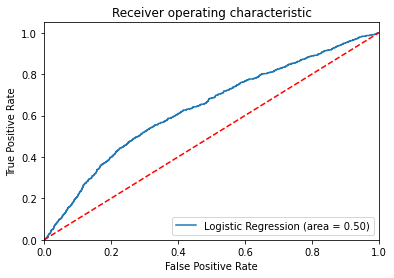

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6524    0]
 [ 881    0]]


# Decission Trees Test #1 for the Group assignment

In [48]:
df.target = 'bucket'
# df.all_variables = ['original_booked_amount', 'outstanding', 'car_type', 'age','loan_expected_duration', 'program_class', 'profession_class', 'F',  'M']
df.all_variables = ['original_booked_amount', 'outstanding', 'car_type_rate', 'age', 'loan_expected_duration', 'program_name_rate', 'profession_rate', 'F', 'M']
#all_variables = ['original_booked_amount', 'outstanding', 'car_type_rate', 'age', 'loan_expected_duration', 'program_name_rate', 'profession_rate', 'F', 'M']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split
"-----------------------"

df_train, df_test = splitter(df, test_size = 0.2, random_state = 42)

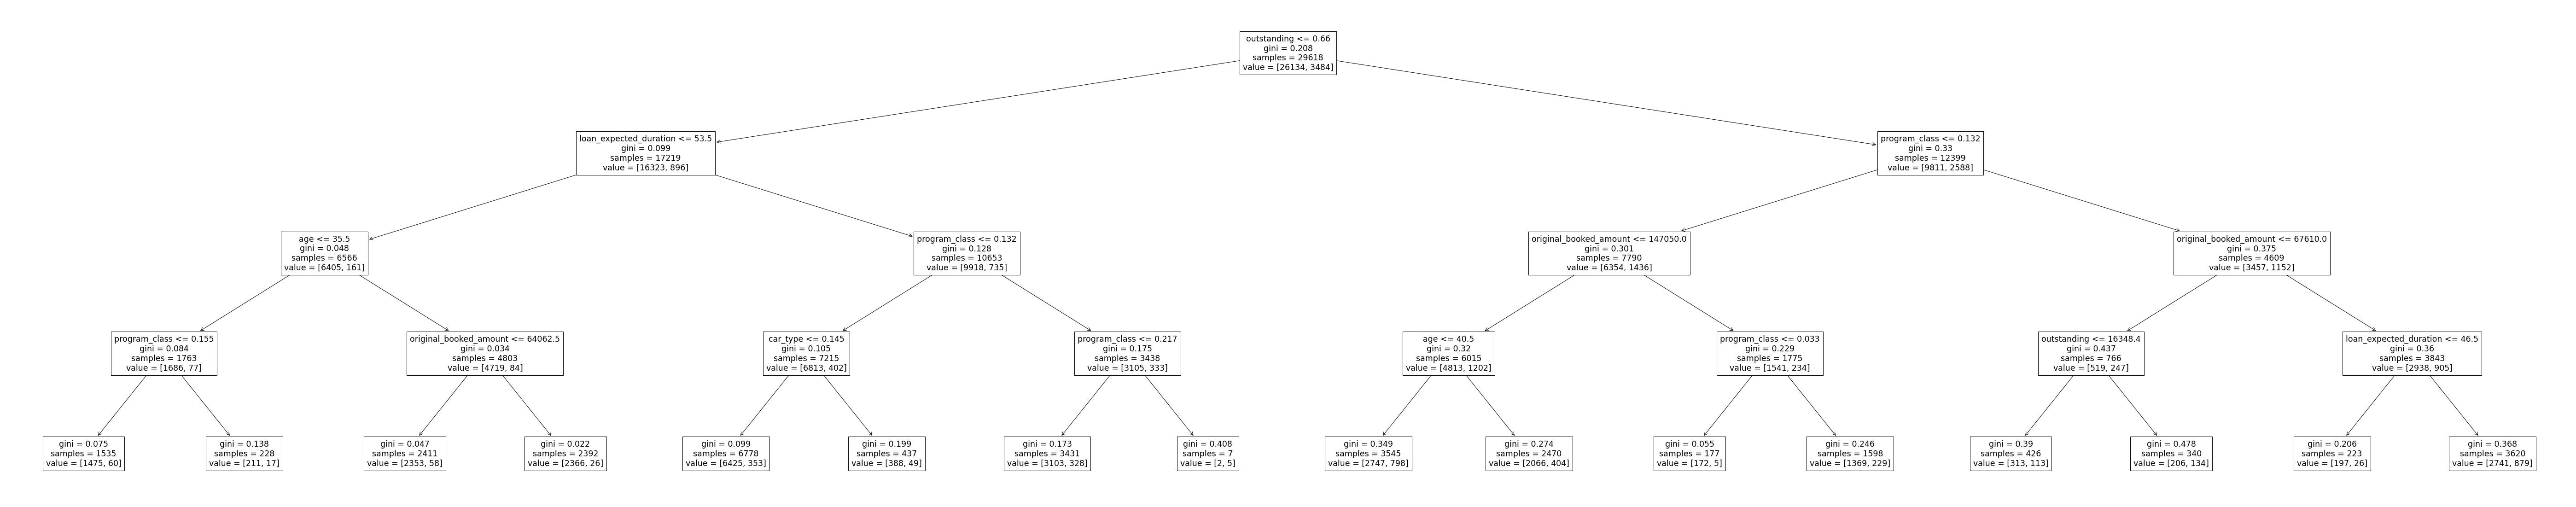

In [50]:
from sklearn import tree
from matplotlib import pyplot as plt

X = df_train[all_variables]
Y = df_train[target]

#build decision tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to iris dataset
clf.fit(X,Y)

#plot decision tree
fig, ax = plt.subplots(figsize=(100, 20)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names= ['original_booked_amount', 'outstanding', 'car_type', 'age','loan_expected_duration', 'program_class', 'profession_class', 'F',  'M'])
plt.show()



In [51]:
X.columns

Index(['original_booked_amount', 'outstanding', 'car_type_rate', 'age',
       'loan_expected_duration', 'program_name_rate', 'profession_rate', 'F',
       'M'],
      dtype='object')

In [52]:
# We export the results of the decission tree using the "export_text" method from sklearn. Later, we create an 
# object that contain the rules of the
from sklearn.tree import export_text
from sklearn.tree import _tree
#tree_rules = export_text(clf, feature_names=list(X.columns))
tree_rules = export_text(clf, feature_names=list(X.columns))
print (tree_rules)

|--- outstanding <= 0.66
|   |--- loan_expected_duration <= 53.50
|   |   |--- age <= 35.50
|   |   |   |--- program_name_rate <= 0.15
|   |   |   |   |--- class: 0
|   |   |   |--- program_name_rate >  0.15
|   |   |   |   |--- class: 0
|   |   |--- age >  35.50
|   |   |   |--- original_booked_amount <= 64062.50
|   |   |   |   |--- class: 0
|   |   |   |--- original_booked_amount >  64062.50
|   |   |   |   |--- class: 0
|   |--- loan_expected_duration >  53.50
|   |   |--- program_name_rate <= 0.13
|   |   |   |--- car_type_rate <= 0.14
|   |   |   |   |--- class: 0
|   |   |   |--- car_type_rate >  0.14
|   |   |   |   |--- class: 0
|   |   |--- program_name_rate >  0.13
|   |   |   |--- program_name_rate <= 0.22
|   |   |   |   |--- class: 0
|   |   |   |--- program_name_rate >  0.22
|   |   |   |   |--- class: 1
|--- outstanding >  0.66
|   |--- program_name_rate <= 0.13
|   |   |--- original_booked_amount <= 147050.00
|   |   |   |--- age <= 40.50
|   |   |   |   |--- class: 0


In [53]:
# Reference: https://mljar.com/blog/extract-rules-decision-tree/ (with modification)

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    final_thresholds = {}

    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
            final_thresholds[name] = threshold
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
        return final_thresholds

    final_thresholds = recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules, final_thresholds
    

In [54]:
rules, final_thresholds = get_rules(clf, all_variables, all_variables)
for r in rules:
    print(r)

if (outstanding <= 0.66) and (loan_expected_duration > 53.5) and (program_name_rate <= 0.132) and (car_type_rate <= 0.145) then class: original_booked_amount (proba: 94.79%) | based on 6,778 samples
if (outstanding > 0.66) and (program_name_rate > 0.132) and (original_booked_amount > 67610.0) and (loan_expected_duration > 46.5) then class: original_booked_amount (proba: 75.72%) | based on 3,620 samples
if (outstanding > 0.66) and (program_name_rate <= 0.132) and (original_booked_amount <= 147050.0) and (age <= 40.5) then class: original_booked_amount (proba: 77.49%) | based on 3,545 samples
if (outstanding <= 0.66) and (loan_expected_duration > 53.5) and (program_name_rate > 0.132) and (program_name_rate <= 0.217) then class: original_booked_amount (proba: 90.44%) | based on 3,431 samples
if (outstanding > 0.66) and (program_name_rate <= 0.132) and (original_booked_amount <= 147050.0) and (age > 40.5) then class: original_booked_amount (proba: 83.64%) | based on 2,470 samples
if (outst

In [55]:
final_thresholds

{'age': 40.5,
 'car_type_rate': 0.14477171003818512,
 'loan_expected_duration': 46.5,
 'original_booked_amount': 67610.0,
 'outstanding': 0.6600000262260437,
 'program_name_rate': 0.13223102688789368}

In [56]:
relevant_columns = []
thresholds = []

for variable in X.columns:
    if variable in tree_rules:
        relevant_columns.append(variable)
        #thresholds.append(threshold)
        #print (variable, ": used for the split.", threshold)
        print (variable, ": used for the split.", final_thresholds[variable])
        #print (variable, ": used for the split.", "\n".join(str(item) for item in threshold))

    else:
        print (variable, ": Not good for segmentation. After analysis we did not find a good split using this variable")

original_booked_amount : used for the split. 67610.0
outstanding : used for the split. 0.6600000262260437
car_type_rate : used for the split. 0.14477171003818512
age : used for the split. 40.5
loan_expected_duration : used for the split. 46.5
program_name_rate : used for the split. 0.13223102688789368
profession_rate : Not good for segmentation. After analysis we did not find a good split using this variable
F : Not good for segmentation. After analysis we did not find a good split using this variable
M : Not good for segmentation. After analysis we did not find a good split using this variable


In [130]:
print ("\033[1m Variable by Variable Risk Based Segmentation Analysis: \033[0m")

for variable in X.columns:
    if variable in tree_rules:
        df_train_seg1 = df_train[df[variable] <final_thresholds[variable]]
        df_train_seg2 = df_train[df[variable] >final_thresholds[variable]]
        df_test_seg1 = df_test[df[variable] <final_thresholds[variable]]
        df_test_seg2 = df_test[df[variable] >final_thresholds[variable]]

        X_train_seg1 = df_train_seg1[all_variables]
        y_train_seg1 = df_train_seg1[target]
        X_test_seg1 = df_test_seg1[all_variables]
        y_test_seg1 = df_test_seg1[target]
        fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)

        X_train_seg2 = df_train_seg2[all_variables]
        y_train_seg2 = df_train_seg2[target]
        X_test_seg2 = df_test_seg2[all_variables]
        y_test_seg2 = df_test_seg2[target]
        fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)        

        def GINI(y_test, y_pred_probadbility):
            from sklearn.metrics import roc_curve, auc
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_probadbility)
            roc_auc = auc(fpr, tpr)
            GINI = (2 * roc_auc) - 1
            return(GINI)

        y_pred_seg1_proba = fitted_model_seg1.predict_proba(X_test_seg1)[:,1]
        y_pred_seg1_fullmodel_proba = fitted_full_model.predict_proba(X_test_seg1)[:,1]
        y_pred_seg2_proba = fitted_model_seg2.predict_proba(X_test_seg2)[:,1]
        y_pred_seg2_fullmodel_proba = fitted_full_model.predict_proba(X_test_seg2)[:,1]
        
        print (variable, "- Good for segmentation:")

        print("     Segment1:", variable, "<", final_thresholds[variable], "[GINI Full Model: {:.4f}% / GINI Segmented Model: {:.4f}%]".format(
            GINI(y_test_seg1, y_pred_seg1_proba)*100,
            GINI(y_test_seg1, y_pred_seg1_fullmodel_proba)*100
        )) 

        print("     Segment2:", variable, ">", final_thresholds[variable], "[GINI Full Model: {:.4f}% / GINI Segmented Model: {:.4f}%]".format(
            GINI(y_test_seg2, y_pred_seg2_proba)*100,
            GINI(y_test_seg2, y_pred_seg2_fullmodel_proba)*100
        )) 

    else: 
      print (variable, "Not good for segmentation. After analysis we did not find a good split using this variable") 

 Variable by Variable Risk Based Segmentation Analysis: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


original_booked_amount - Good for segmentation:
     Segment1: original_booked_amount < 67610.0 [GINI Full Model: 3.8388% / GINI Segmented Model: 3.8388%]
     Segment2: original_booked_amount > 67610.0 [GINI Full Model: 26.7895% / GINI Segmented Model: 26.7895%]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


outstanding - Good for segmentation:
     Segment1: outstanding < 0.6600000262260437 [GINI Full Model: -18.8904% / GINI Segmented Model: -18.8904%]
     Segment2: outstanding > 0.6600000262260437 [GINI Full Model: 8.2376% / GINI Segmented Model: 8.2376%]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


car_type_rate - Good for segmentation:
     Segment1: car_type_rate < 0.14477171003818512 [GINI Full Model: 26.4802% / GINI Segmented Model: 26.4802%]
     Segment2: car_type_rate > 0.14477171003818512 [GINI Full Model: 12.7661% / GINI Segmented Model: 12.7661%]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


age - Good for segmentation:
     Segment1: age < 40.5 [GINI Full Model: 21.7900% / GINI Segmented Model: 21.7900%]
     Segment2: age > 40.5 [GINI Full Model: 15.4826% / GINI Segmented Model: 15.4826%]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


loan_expected_duration - Good for segmentation:
     Segment1: loan_expected_duration < 46.5 [GINI Full Model: 18.2667% / GINI Segmented Model: 18.2667%]
     Segment2: loan_expected_duration > 46.5 [GINI Full Model: 25.3106% / GINI Segmented Model: 25.3106%]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


program_name_rate - Good for segmentation:
     Segment1: program_name_rate < 0.13223102688789368 [GINI Full Model: 32.5423% / GINI Segmented Model: 32.5423%]
     Segment2: program_name_rate > 0.13223102688789368 [GINI Full Model: 25.4960% / GINI Segmented Model: 25.4960%]
profession_rate Not good for segmentation. After analysis we did not find a good split using this variable
F Not good for segmentation. After analysis we did not find a good split using this variable
M Not good for segmentation. After analysis we did not find a good split using this variable


In [131]:
relevent_categories = ['car_type', 'program_name']
cat_type = {}

for i in relevent_categories:
  column_header = i+'_rate'
  for cat in observation_rate[i]:   
    if observation_rate[i][cat] >= final_thresholds[column_header]: 
      #cat_type[i+'_segment1'].append(cat)
      test1 = i+'_segment1'
      cat_type.setdefault(test1, []).append(cat)
    else:  
      #cat_type[i+'_segment2'].append(cat)
      test2 = i+'_segment2'
      cat_type.setdefault(test2, []).append(cat)

print (cat_type)

{'car_type_segment2': ['RENAULT', 'KIA', 'HYUNDAI', 'NISSAN', 'Brilliance', 'CHEVROLET', 'SUZUKI', 'Speranza', 'GELY', 'SKODA', 'MITSUBISHI', 'Changan', 'Livan', 'TOYOTA', 'Great Wall', 'VOLKSWAGEN', 'FIAT', 'OPEL', 'Chana', 'Citroen', 'SEAT', 'Peugeot', 'DAIHATSU', 'Saipa', 'PROTON', 'VOLVO', 'MERCEDES', 'MAZDA', 'BMW', 'SUBARU', 'FORD', 'Gelory', 'Isuzu', 'HONDA', 'Mahindra', 'MG', 'Ssang Yong', 'CHANGY', 'MINI', 'AUDI', 'Dodge', 'FLORIDA', 'DFSK', 'HAWTAI', 'JAGUAR', 'VICTORY'], 'car_type_segment1': ['JEEP', 'CARRY', 'LADA', 'BYD', 'Jack', 'CHERY', 'MABLE', 'BAIC', 'ZEMEX', 'Kenbo', 'HAIMA', 'SAWEAST', 'Faw', 'Zoty'], 'program_name_segment2': ['Auto Loans 50% Down Payment - Employed', 'Auto Loans 50% Down Payment - Self Employed', 'Auto Loans Payroll Clients', 'Auto Loans 40% Down Payment - Employed', 'Auto Loans Special Deals', 'Pick Up and Small Trucks', 'Auto Loans 20% Down Payment - Self Employed', 'Auto Loans Secured against CD', 'Auto Loans Doctors - Self Employed', 'Auto Loan